In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import sympy as sym
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

**2D Vector Rotation**

This Python code showcases 2D vector rotation using a rotation matrix. Key steps include:

**Define Vectors:**
- `basis_vector_x` and `basis_vector_y`: original basis vectors.
- `test_vector`: vector to be rotated.

**Set Rotation Angle:**
- `angle_degrees`: rotation angle in degrees.

**Convert Angle to Radians:**
- `angle_radians`: angle in radians.

**Create Rotation Matrix:**
- `rotation_matrix`: 2x2 matrix for rotation.

**Rotate Vectors:**
- `rotated_vector_basis_x` and `rotated_vector_basis_y`: rotated basis vectors.
- `rotated_vector_test_vector`: result of rotating the test vector.

**Plot Vectors:**
- Blue: original axes; Red: rotated axes and test vector.
- Display includes legend, gridlines, and axis lines.



In [16]:
# Plot formatting details
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Helvetica")
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")

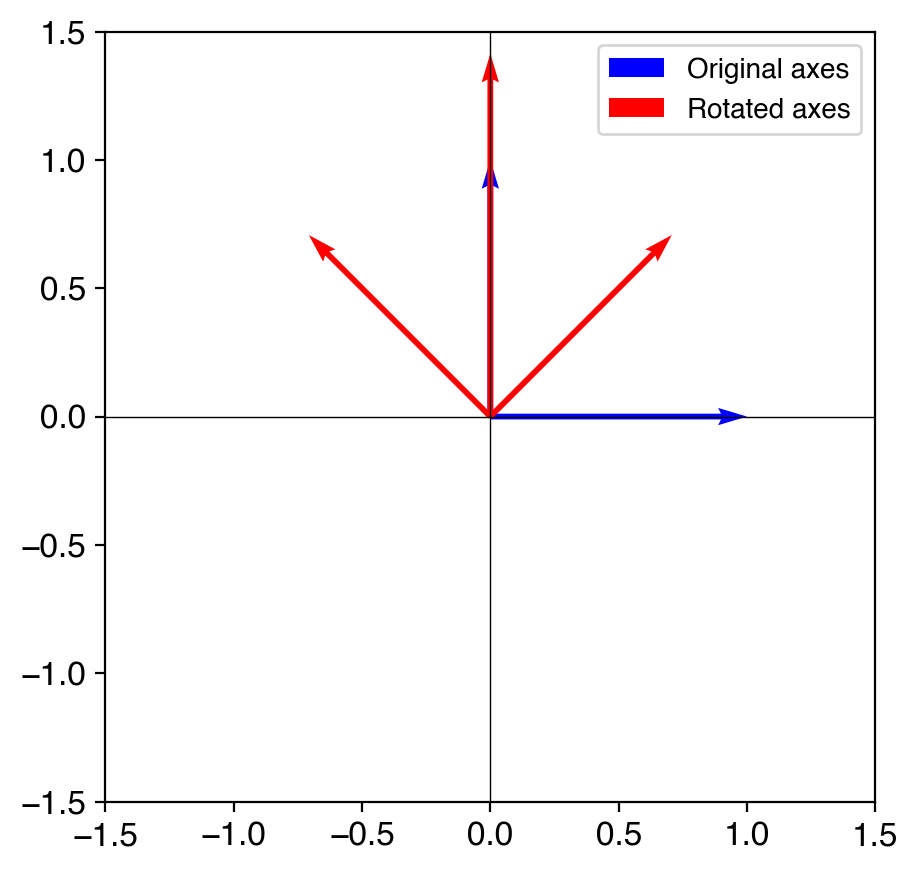

In [23]:
# Define the basis vectors and the vector to be rotated
basis_vector_x = np.array([0, 1])
basis_vector_y = np.array([1, 0])
test_vector = np.array([1, 1])

# Specify the rotation angle in degrees
angle_degrees = 45 

# Convert the angle to radians
angle_radians = np.radians(angle_degrees)

# Create a 2x2 rotation matrix
rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                            [np.sin(angle_radians), np.cos(angle_radians)]])

# Rotate the basis vectors and the test vector using the rotation matrix
rotated_vector_basis_x = np.dot(rotation_matrix, basis_vector_x)
rotated_vector_basis_y = np.dot(rotation_matrix, basis_vector_y)
rotated_vector_test_vector = np.matmul(rotation_matrix, test_vector)

# Create a plot to visualize the original and rotated vectors
fig, ax = plt.subplots(figsize=(5,5), dpi=200)

# Plot the original axes in blue
ax.quiver(0, 0, basis_vector_x[0], basis_vector_x[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original axes')
ax.quiver(0, 0, basis_vector_y[0], basis_vector_y[1], angles='xy', scale_units='xy', scale=1, color='b')

# Plot the rotated axes and the rotated test vector in red
ax.quiver(0, 0, rotated_vector_basis_x[0], rotated_vector_basis_x[1], angles='xy', scale_units='xy', scale=1, color='r', label='Rotated axes')
ax.quiver(0, 0, rotated_vector_basis_y[0], rotated_vector_basis_y[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver(0, 0, rotated_vector_test_vector[0], rotated_vector_test_vector[1], angles='xy', scale_units='xy', scale=1, color='r')

# Set plot limits and add legend
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.legend()

# Add gridlines and axis lines
plt.grid(visible=False)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Set aspect ratio to be equal and display the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


**3D Vector Rotation with Euler Angles**

This Python code rotates a 3D vector using Euler angles (yaw, pitch, and roll). Key steps include:

**Define Basis Vectors:**
- `basis_vectors`: Identity matrix representing the basis vectors.

**Specify Euler Angles:**
- `yaw`, `pitch`, and `roll` are the angles of rotation around the Z, Y, and X axes, respectively.

**Convert Angles to Radians:**
- `yaw_rad`, `pitch_rad`, and `roll_rad` store the angles in radians.

**Create Rotation Matrices:**
- `Rz`, `Ry`, and `Rx` are individual rotation matrices for the Z, Y, and X axes.

**Combine Rotation Matrices:**
- `R` is the overall rotation matrix obtained by multiplying individual matrices.

**Rotate Vectors:**
- `rotated_vectors` stores the result of rotating the basis vectors.

**Plot Vectors in 3D:**
- Original vectors are in blue, and rotated vectors are in red.


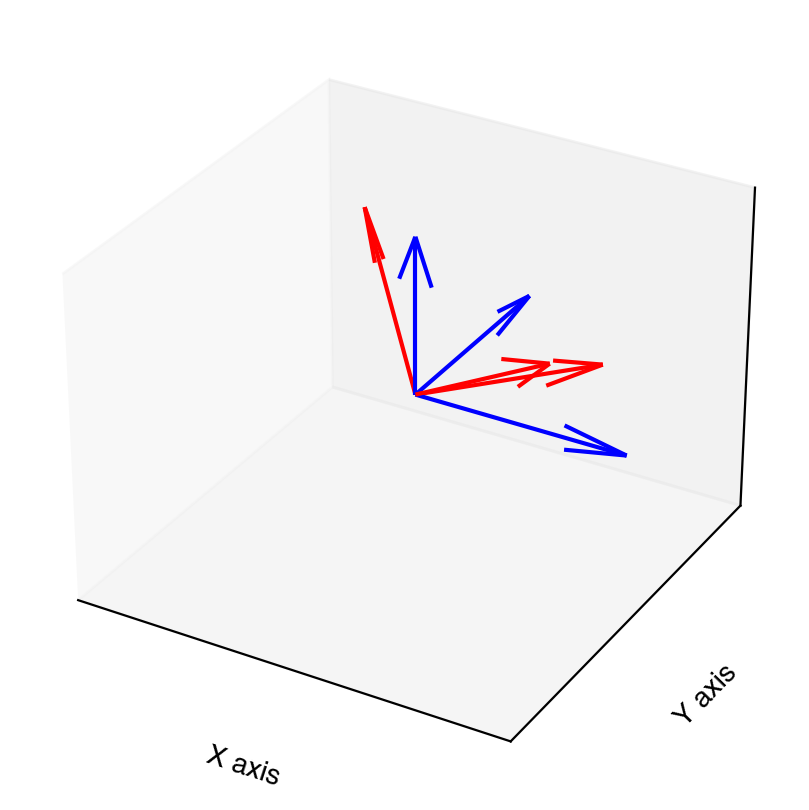

In [26]:

# Define the identity matrix as the basis vectors
basis_vectors = np.identity(3)

# Specify Euler angles for rotation
yaw, pitch, roll = 30, 30, 30

# Convert Euler angles to radians
yaw_rad = np.radians(yaw)
pitch_rad = np.radians(pitch)
roll_rad = np.radians(roll)

# Create individual rotation matrices for each axis
Rz = np.array([[np.cos(yaw_rad), -np.sin(yaw_rad), 0],
               [np.sin(yaw_rad), np.cos(yaw_rad), 0],
               [0, 0, 1]])

Ry = np.array([[np.cos(pitch_rad), 0, np.sin(pitch_rad)],
               [0, 1, 0],
               [-np.sin(pitch_rad), 0, np.cos(pitch_rad)]])

Rx = np.array([[1, 0, 0],
               [0, np.cos(roll_rad), -np.sin(roll_rad)],
               [0, np.sin(roll_rad), np.cos(roll_rad)]])

# Combine individual rotation matrices to obtain the overall rotation matrix
R = np.matmul(Rz, np.matmul(Ry, Rx))

# Rotate the basis vectors
rotated_vectors = R @ basis_vectors

# Display the rotated vectors in a 3D plot
fig = plt.figure(figsize=(5,5), dpi=200)
ax = fig.add_subplot(111, projection='3d')

# Plot the original and rotated vectors
for i in range(3):
    ax.quiver(0, 0, 0, basis_vectors[i, 0], basis_vectors[i, 1], basis_vectors[i, 2], color='b')
    ax.quiver(0, 0, 0, rotated_vectors[i, 0], rotated_vectors[i, 1], rotated_vectors[i, 2], color='r')

# Set plot limits and labels
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.grid(visible=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# Show the 3D plot
plt.show()


**3D Euler Angle Rotation Animation**

This Python code animates the rotation of a 3D vector using Euler angles (yaw, pitch, and roll). Key features include:

- **Rotation Matrix Function:**
  - `create_rotation_matrix` generates a 3D rotation matrix based on yaw, pitch, and roll angles.

- **Basis Vectors and Final Angles:**
  - `basis_vectors`: Identity matrix representing the basis vectors.
  - `final_yaw`, `final_pitch`, and `final_roll`: Desired final rotation angles in degrees.

- **Animation Parameters:**
  - `num_frames_per_rotation`: Number of frames for each rotation.
  - Animation spans three phases for yaw, pitch, and roll rotations.

- **3D Plot Setup:**
  - Visualization of original and rotated vectors in a 3D plot.

- **Animation:**
  - Utilizes `FuncAnimation` to animate the rotation, updating quivers at each frame.




MovieWriter imagemagick unavailable; using Pillow instead.


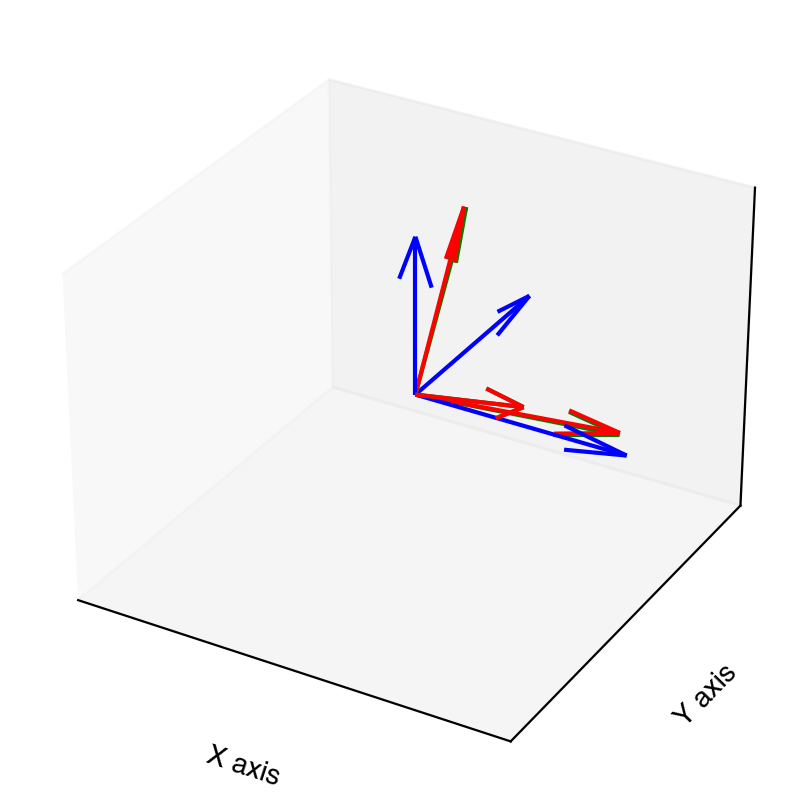

In [25]:


# Function to create rotation matrices
def create_rotation_matrix(yaw, pitch, roll):
    yaw = np.radians(yaw)
    pitch = np.radians(pitch)
    roll = np.radians(roll)
    Rz = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                   [np.sin(yaw), np.cos(yaw), 0],
                   [0, 0, 1]])
    Ry = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                   [0, 1, 0],
                   [-np.sin(pitch), 0, np.cos(pitch)]])
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(roll), -np.sin(roll)],
                   [0, np.sin(roll), np.cos(roll)]])
    return Rx @ Ry @ Rz

# Basis vectors
basis_vectors = np.identity(3)

# Desired final yaw, pitch, and roll (in degrees)
final_yaw, final_pitch, final_roll = 30, 30, 30
num_frames_per_rotation = 100  # Number of frames for each rotation

# Generating linspace for yaw, pitch, and roll
roll_values = np.concatenate([np.zeros(num_frames_per_rotation), np.zeros(num_frames_per_rotation),
                             np.linspace(0, np.radians(final_roll), num_frames_per_rotation)])

pitch_values = np.concatenate([np.zeros(num_frames_per_rotation),
                               np.linspace(0, np.radians(final_pitch), num_frames_per_rotation),
                               np.full(num_frames_per_rotation, np.radians(final_pitch))])

yaw_values = np.concatenate([np.linspace(0, np.radians(final_yaw), num_frames_per_rotation),
                             np.full(num_frames_per_rotation, np.radians(final_yaw)),
                             np.full(num_frames_per_rotation, np.radians(final_yaw))])

total_frames = num_frames_per_rotation * 3

# Set up the figure for 3D plotting
fig = plt.figure(figsize=(5,5), dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.grid(visible=False)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
for i in range(3):
    ax.quiver(0, 0, 0, basis_vectors[i, 0], basis_vectors[i, 1], basis_vectors[i, 2], color='b')
# Create rotation matrices for animation
rots = []
for i in np.arange(0, final_yaw + final_yaw / (int(total_frames / 3)), final_yaw / (int(total_frames / 3))):
    rots.append(create_rotation_matrix(i, 0, 0) @ np.eye(3))
for j in np.arange(0, final_pitch + final_pitch / (int(total_frames / 3)),
                   final_pitch / (int(total_frames / 3)))[:-1]:
    rots.append(create_rotation_matrix(0, j, 0) @ create_rotation_matrix(final_yaw, 0, 0))
for k in np.arange(0, final_roll + final_roll / (int(total_frames / 3)),
                  final_roll / (int(total_frames / 3)))[:-1]:
    rots.append(create_rotation_matrix(0, 0, k) @ create_rotation_matrix(final_yaw, final_pitch, 0))

rots = np.array(rots)

# Initialize quivers
quivers = [ax.quiver(0, 0, 0, v[0], v[1], v[2], color='b') for v in basis_vectors]

# Set time parameters for animation
t0 = 0
t_end = 15
dt = 0.05
t = np.arange(t0, t_end + dt, dt)
frame_amount = len(t) - 1
rotated_vectors=create_rotation_matrix(final_yaw, final_pitch, final_roll)
for i in range(3):
     ax.quiver(0, 0, 0, rotated_vectors[i, 0], rotated_vectors[i, 1], rotated_vectors[i, 2], color='g')

def update(frame):
    # Update quivers
    for i in range(3):
        quivers[i].remove()
        quivers[i] = ax.quiver(0, 0, 0, rots[frame][i, 0], rots[frame][i, 1], rots[frame][i, 2], color='r')


# Create the animation
ani = FuncAnimation(fig, update, frames=frame_amount, interval=50)

ani.save('rotation_animation_3D_Euler321.gif', writer='imagemagick')

# Display the animation
plt.show()


**3D Rotation Animation about an Axis**

This Python code generates an animation illustrating the rotation of 3D basis vectors about a specified axis by a given angle.

**Code Explanation:**

- **Rotation Matrix Calculation:**
  - The `calculate_rotation_matrix` function computes the rotation matrix using the Rodrigues' formula.

- **Rotation Matrix Generation:**
  - The `generate_rotation_matrices` function creates rotation matrices for different phi values.

- **Plotting Setup:**
  - The code sets up a 3D plot and initializes quivers for X, Y, and Z basis vectors.

- **Animation Update Function:**
  - The `update` function handles the dynamic update of quivers for each frame of the animation.

- **Animation Creation and Saving:**
  - The `animation.FuncAnimation` class is utilized to create the animation.
  - The resulting animation is saved as 'rotation_animation_3D.gif' using the 'imagemagick' writer.




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter imagemagick unavailable; using Pillow instead.


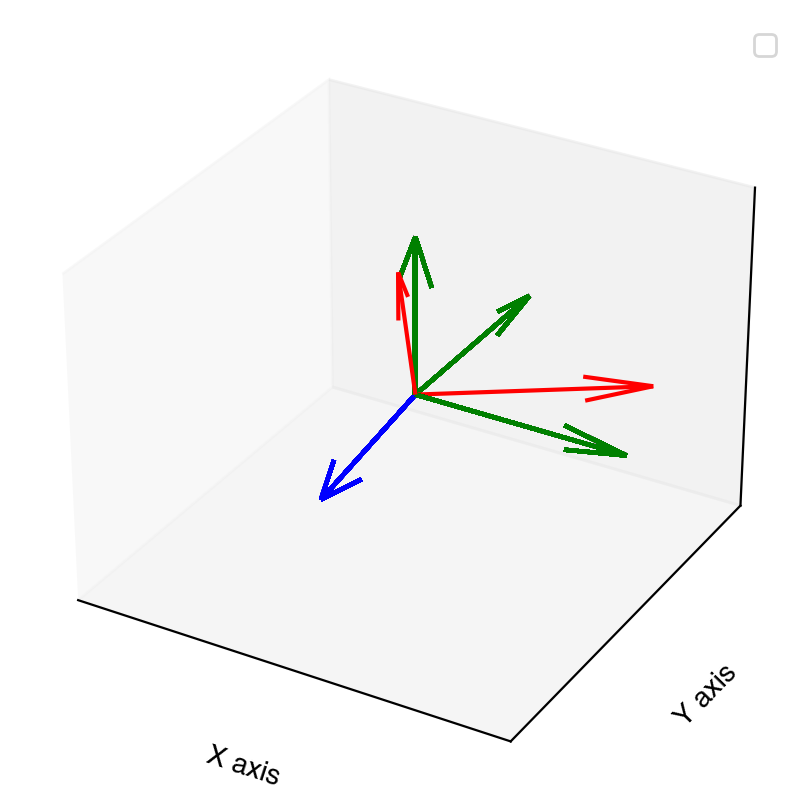

In [27]:
# Function to calculate the rotation matrix
def calculate_rotation_matrix(phi_value, e_values):
    e_x, e_y, e_z, phi = sym.symbols('e_x e_y e_z phi')

    # Define the rotation axis
    e = sym.Matrix([[e_x], [e_y], [e_z]])

    # Skew-symmetric matrix for the rotation axis
    skew_matrix = sym.Matrix([[0, -e_z, e_y],
                              [e_z, 0, -e_x],
                              [-e_y, e_x, 0]])

    # Rotation matrix using the Rodrigues' formula
    C = (sym.cos(phi)) * sym.eye(3) + (1 - sym.cos(phi)) * (e * e.T) + sym.sin(phi) * skew_matrix

    # Substitute values into the rotation matrix
    C_substituted = C.subs([(phi, phi_value), (e_x, e_values[0]), (e_y, e_values[1]), (e_z, e_values[2])])
    
    # Convert to a numpy array
    C_substituted = np.array(C_substituted.tolist(), dtype='float')

    # Normalize the columns to maintain orthogonality
    C_column_magnitudes = np.linalg.norm(C_substituted, axis=0)
    C_normalized_matrix = C_substituted / C_column_magnitudes
    
    return C_normalized_matrix

# Function to generate rotation matrices for different phi values
def generate_rotation_matrices(phi_values, e_values):
    rotation_matrices = []
    for phi in phi_values:
        rotation_matrix = calculate_rotation_matrix(phi, e_values)
        rotation_matrices.append(rotation_matrix)
    return rotation_matrices

# Generate phi values using linspace
phi_values = np.linspace(0, np.deg2rad(33.22594220328758), 100)
e_values = (-0.47234749048314584, 0.0, -0.8814124166553785)
rotation_matrices = generate_rotation_matrices(phi_values, e_values)

# Set up the figure for 3D plotting
fig = plt.figure(figsize=(5,5), dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.grid(visible=False)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.legend()

# Initialize quivers for X, Y, Z basis vectors
quiver_X = ax.quiver(0, 0, 0, 1, 0, 0, color='r', length=1)
quiver_Y = ax.quiver(0, 0, 0, 0, 1, 0, color='g', length=1)
quiver_Z = ax.quiver(0, 0, 0, 0, 0, 1, color='b', length=1)

# Animation update function
def update(num):
    global quiver_X, quiver_Y, quiver_Z
    rotation_matrix = rotation_matrices[num]
    quiver_X.remove()
    quiver_Y.remove()
    quiver_Z.remove()
    quiver_X = ax.quiver(0, 0, 0, *rotation_matrix[0], color='r', length=1)
    quiver_Y = ax.quiver(0, 0, 0, *rotation_matrix[1], color='r', length=1)
    quiver_Z = ax.quiver(0, 0, 0, *rotation_matrix[2], color='r', length=1)
    
    ax.quiver(0, 0, 0, e_values[0], e_values[1], e_values[2], color='b', length=1)
    
    ax.quiver(0, 0, 0, 1, 0, 0, color='g', label='basis')
    ax.quiver(0, 0, 0, 0, 1, 0, color='g')
    ax.quiver(0, 0, 0, 0, 0, 1, color='g')
    
    return quiver_X, quiver_Y, quiver_Z

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(rotation_matrices), interval=50)

# Save the animation as a GIF
ani.save('rotation_animation_3D.gif', writer='imagemagick')

# Display the animation
plt.show()


**3D Euler Angle Animation: Intrinsic and Extrinsic Rotations**

This Python script animates the rotation of a 3D unit cube, illustrating both intrinsic and extrinsic Euler angle rotations.

**Code Overview:**

- **Cube Rotation:**
  - The code rotates a unit cube using Euler angles around specified axes.
  - Two rotations are visualized: intrinsic (rotation about moving axis) and extrinsic (rotation about fixed axis).

- **Rotation Matrix Calculation:**
  - The `rotation_matrix` function generates rotation matrices based on Euler angles.

- **Plotting Setup:**
  - The script defines a function `plot_cube` to visualize cubes with distinct colors and labels.

- **Animation:**
  - The animation is created using the `FuncAnimation` class.
  - The cube undergoes stepwise rotations, portraying both intrinsic and extrinsic rotations.

- **Parameters:**
  - `theta1_final`, `theta2_final`, `theta3_final`: Final rotation angles in degrees.
  - `sequence`: Rotation sequence for Euler angles ('zxz' in this example).
  - `rot_type`: Rotation type, either intrinsic or extrinsic.
  - `frame_num`: Total number of frames for the animation.

**Visualization:**

Two cubes are displayed in the animation:

- **Rotating Cube (Blue):**
  - Represents the unit cube undergoing stepwise rotations based on Euler angles.
  - Color: Blue

- **Final Position Cube (Red):**
  - Represents the unit cube's orientation after reaching the final rotation angles.
  - Color: Red


MovieWriter imagemagick unavailable; using Pillow instead.


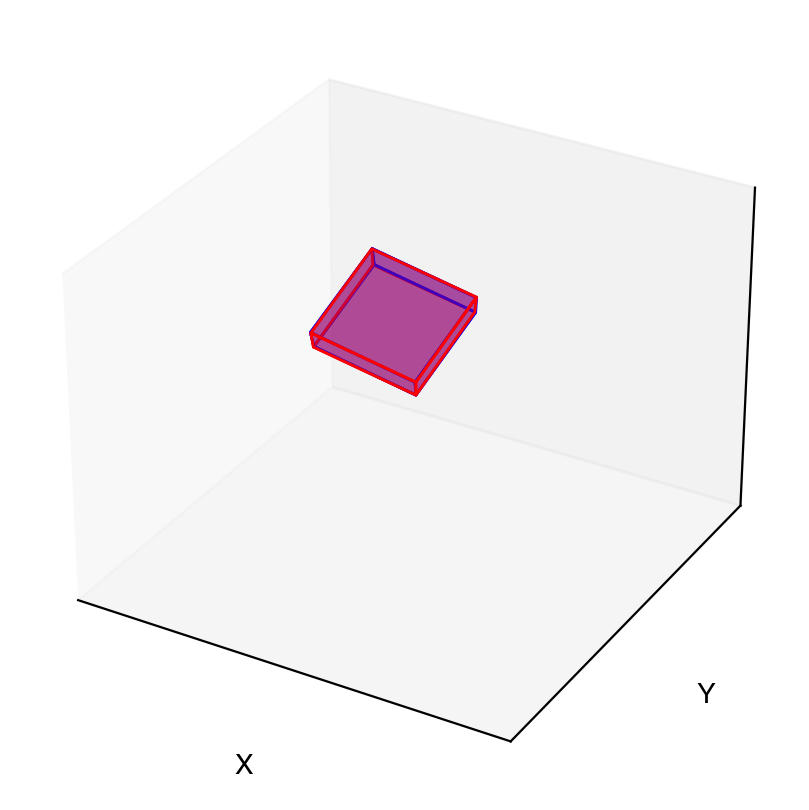

In [28]:
# Function to rotate vertices using a rotation matrix
def rotate_vertices(vertices, rotation_matrix):
    rotated_vertices = []
    for vertex in vertices:
        rotated_vertex = rotation_matrix @ sym.Matrix(vertex)
        rotated_vertices.append(rotated_vertex)
    return np.array(rotated_vertices).astype(float).reshape(-1, 3)

# Define the vertices and edges of a cube
vertices = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                     [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])
faces = [[0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4], [2, 3, 7, 6], [0, 3, 7, 4], [1, 2, 6, 5]]



fig = plt.figure(figsize=(5,5), dpi=200)
ax = fig.add_subplot(111, projection='3d')

def plot_cube(vertices, color, label):
    for face in faces:
        ax.add_collection3d(Poly3DCollection([vertices[face]], color=color, alpha=0.25, label=label))
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_xlim([-2, 2])
        ax.set_ylim([-2, 2])
        ax.set_zlim([-2, 2])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        ax.grid(False)

# Function to calculate a rotation matrix for Euler angles
def rotation_matrix(theta_1, theta_2, theta_3, sequence):
    # Define basic rotation matrices for each axis
    def Rx(theta):
        return sym.Matrix([[1, 0, 0], [0, sym.cos(theta), -sym.sin(theta)], [0, sym.sin(theta), sym.cos(theta)]])

    def Ry(theta):
        return sym.Matrix([[sym.cos(theta), 0, sym.sin(theta)], [0, 1, 0], [-sym.sin(theta), 0, sym.cos(theta)]])

    def Rz(theta):
        return sym.Matrix([[sym.cos(theta), -sym.sin(theta), 0], [sym.sin(theta), sym.cos(theta), 0], [0, 0, 1]])

    # Validate rotation sequence
    if len(sequence) != 3 or any(axis not in 'xyz' for axis in sequence):
        raise ValueError("Invalid rotation sequence. Use combinations of 'x', 'y', and 'z'.")

    # Check for consecutive rotations about the same axis
    if any(sequence[i] == sequence[i+1] for i in range(len(sequence) - 1)):
        raise ValueError("Consecutive rotations about the same axis are not allowed.")

    # Create rotation matrix based on the sequence
    rotations = {'x': Rx, 'y': Ry, 'z': Rz}
    R = sym.eye(3)
    for axis, theta in zip(sequence, [theta_1, theta_2, theta_3]):
        R = R * rotations[axis](theta)

    return R

# Animation function to perform stepwise rotations and visualize cubes
def animate_stepwise_combined(frame, theta1, theta2, theta3, sequence, rot_type):
    ax.cla()
    ax.set_xlim([0, 1.5]), ax.set_ylim([0, 1.5]), ax.set_zlim([0, 1.5])
    ax.set_xlabel('X'), ax.set_ylabel('Y'), ax.set_zlabel('Z')

    # Convert rotation angles to radians
    theta1_rad = np.deg2rad(theta1)
    theta2_rad = np.deg2rad(theta2)
    theta3_rad = np.deg2rad(theta3)

    # Determine which rotation to perform based on the frame number
    if frame <= (frame_num/3):  # First rotation
        theta = np.deg2rad(theta1 * frame / (frame_num/3))
        theta_ex = np.deg2rad(theta3 * frame / (frame_num/3))
        if rot_type == 'intrinsic':
            R = rotation_matrix(theta, 0, 0, sequence)
        else:  # 'extrinsic'
            R = rotation_matrix(0, 0, theta_ex, sequence)
    elif frame <= 2*(frame_num/3):  # Second rotation
        theta = np.deg2rad(theta2 * (frame - (frame_num/3)) / (frame_num/3))
        theta_ex = np.deg2rad(theta2 * (frame - (frame_num/3)) / (frame_num/3))
        if rot_type == 'intrinsic':
            R = rotation_matrix(theta1_rad, theta, 0, sequence)
        else:  # 'extrinsic'
            R = rotation_matrix(0, theta_ex, theta3_rad, sequence)
    else:  # Third rotation
        theta = np.deg2rad(theta3 * (frame - 2*(frame_num/3)) / (frame_num/3))
        theta_ex = np.deg2rad(theta1 * (frame - 2*(frame_num/3)) / (frame_num/3))
        if rot_type == 'intrinsic':
            R = rotation_matrix(theta1_rad, theta2_rad, theta, sequence)
        else:  # 'extrinsic'
            R = rotation_matrix(theta_ex, theta2_rad, theta3_rad, sequence)

    # Rotate initial cube vertices and plot
    rotated_vertices = rotate_vertices(vertices, R)
    plot_cube(rotated_vertices, 'blue', "Rotating Cube")

    # Rotate to the final position and plot
    R_final = rotation_matrix(np.deg2rad(theta1_final), np.deg2rad(theta2_final), np.deg2rad(theta3_final), sequence)
    rotated_vertices_final = rotate_vertices(vertices, R_final)
    plot_cube(rotated_vertices_final, 'red', "Final Position")

# Final rotation angles in degrees
theta1_final = 30
theta2_final = 45
theta3_final = 60
sequence = 'zxz'
rot_type = 'extrinsic' 
frame_num = 151

# Create the animation
ani_euler = FuncAnimation(fig, lambda frame: animate_stepwise_combined(frame, theta1_final, theta2_final, theta3_final, sequence, rot_type), frames=np.arange(0, frame_num), interval=50)
ani_euler.save('rotation_animation_3D_intext.gif', writer='imagemagick')
plt.show()
